# The Alchemist of Dementia Combo
This analysis will focus on a little combo for MTG involving two cards

>Undead Alchemist - 3U  
>If a zombie you control would cause combat damage to  
>a player, that player put that many cards from the top  
>of his or her library into his or her graveyard instead.  
> 
>Whenever a creature card is put in an opponents graveyard coming  
>from his or her library exile that card e put a 2/2 black Zombie  
>token into play  

>Altar of Dementia - 2  
>Sacrifice a creature: target opponent put a number of  
>cards equal to the power of that creature from the  
>top of his or her library into his or her graveyard.  

The combo is simple, but not game winning, just use a creature to mill your opponent  
creating more zombies to mill some more. Using lords you can mill more for each zombie  
but how good is this combo? Let's take a look.

## Starting conditions

Let's assume you have Undead Alchemist and Altar of Dementia on the board and sacrifices a $p$/$t$ Zombie to start the combo, let's say your opponent has $C_0$ cards remaining in their deck and $k_0$ of them are creature cards, each time you sacrifice a Zombie, they mill $p$ cards, this amounts to a hypergeometric distribution for the random variable $M$, the amount of creatures milled: $M \sim HGeom(k_0,C_0,p)$ 

In [242]:
%config Completer.use_jedi = False
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

In [243]:
# Tweak the parameters for different situations
C_0 = 80
k_0 = 20
p = 2

In [244]:
# A hypergeometric random variable with C_0 population, k_0 successes and p draws
M = hypergeom(C_0, k_0, p)

In [245]:
# With p draws we can get a maximum of p successes
# This should be 1 since it is the total probability of all possible events
sum([M.pmf(x) for x in range(p+1)])

1.0000000000000007

In [246]:
# On average we should expect to mill p(k_0/C_0) on each iteration
M.mean()

0.5

In [247]:
# We can now create a function to simulate the combo, each iteration changes the parameters
# and we stop when we have milled everything or when we don't have anymore zombies
def simulate_combo(C, k, p, zombies=1):
    # While we have creatures and the opponent has cards in the deck
    while C > 0 and zombies > 0 and p < C:
        M = hypergeom(C, k, p)
        creatures_milled = M.rvs()
        # We sacrifice one zombie and make as many as the amount of creatures milled
        zombies = zombies - 1 + creatures_milled
        # Our opponen always mills equal to the power
        C -= p
        k -= creatures_milled
    # If they are milled completely or we have more power than cards
    if C - (p*zombies) <= 0:
        return True
    return False

In [251]:
def combo_probability(C, k, p, iters=50):
    count = 0
    for i in range(iters):
        count += 1 if simulate_combo(C,k,p) else 0
    return count/iters

In [255]:
card_amounts = range(10, 80, 10)
creatures = range(5,40,5)

probs_p_4 = [
    [
        1 if k > C else combo_probability(C, k, 4) for k in creatures
    ] 
    for C in card_amounts
]

In [256]:
probs_p_4

[[1.0, 1.0, 1, 1, 1, 1, 1],
 [0.42, 0.92, 1.0, 1.0, 1, 1, 1],
 [0.0, 0.66, 0.92, 0.98, 1.0, 1.0, 1],
 [0.0, 0.18, 0.84, 0.94, 0.96, 1.0, 1.0],
 [0.0, 0.0, 0.5, 0.84, 0.9, 0.98, 1.0],
 [0.0, 0.0, 0.24, 0.56, 0.84, 0.94, 0.98],
 [0.0, 0.0, 0.0, 0.34, 0.68, 0.78, 0.88]]

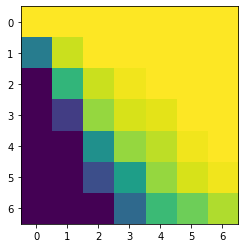

In [257]:
plt.imshow(probs_p_4)